# Microorganism Classification Project
**Author:** Kai Uechi

## Overview
temp

## Business Problem
A hospital needs to identify different types of microorganisms for a variety of reasons, like diagnosing infections and determining antibiotic resistance. Although modern DNA sequencing techniques have improved speed, it still takes several hours to receive results. Utilizing machine learning classification, it is possible to identify types of microorganisms faster and more economically than can be achieved with sequencing.


## Data Understanding
The dataset used in this project consists of information extracted from microscopic images. The dataset includes information regarding various genera and classes of fungi and algae, as well as protozoa. There are 10 categories in total.

Some of these microorganisms display antibiotic properties, such as penicillium and spirogyra.
Others, such as protozoa and yeast, are responsible for harmful infections.

In [156]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipe
pd.set_option('display.max_columns', None)

np.random.seed(8492)

#import data
df = pd.read_csv('data/microbes.csv')
df.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.90,1.75,2.97,3.12,3.12,2.97,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.20,1.77,3.95,6.08,6.08,5.49,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,10.20,1.51,3.49,5.95,5.95,5.99,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,10.70,3.34,3.63,8.93,8.93,8.90,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,1.22,8.40,17.10,10.20,10.20,10.20,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [157]:
#inspect feature types and any missing values

df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         30527 non-null  float64
 1   Eccentricity     30527 non-null  float64
 2   EquivDiameter    30527 non-null  float64
 3   Extrema          30527 non-null  float64
 4   FilledArea       30527 non-null  float64
 5   Extent           30527 non-null  float64
 6   Orientation      30527 non-null  float64
 7   EulerNumber      30527 non-null  float64
 8   BoundingBox1     30527 non-null  float64
 9   BoundingBox2     30527 non-null  float64
 10  BoundingBox3     30527 non-null  float64
 11  BoundingBox4     30527 non-null  float64
 12  ConvexHull1      30527 non-null  float64
 13  ConvexHull2      30527 non-null  float64
 14  ConvexHull3      30527 non-null  float64
 15  ConvexHull4      30527 non-null  float64
 16  MajorAxisLength  30527 non-null  float64
 17  MinorAxisLen

In [158]:
#inspect feature stats
df.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,2.085481,2.640499,11.113760,11.113760,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,2.166312,2.488448,6.033357,6.033357,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,0.849000,1.150000,5.980000,5.980000,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,1.500000,1.940000,11.100000,11.100000,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,2.660000,3.380000,16.000000,16.000000,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


<AxesSubplot:>

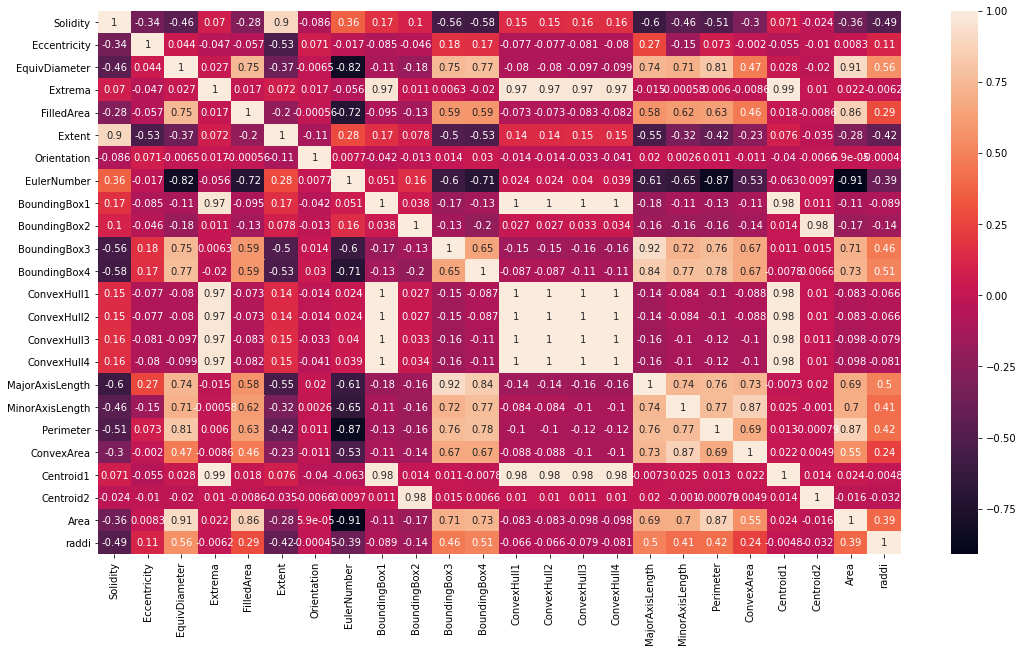

In [159]:
plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

In [160]:
#inspect class imbalance
class_balance = pd.DataFrame(df.microorganisms.value_counts())
class_balance['Occ'] = df.microorganisms.value_counts(normalize=True)
class_balance.columns = ['Count', 'Percentage']
class_balance

,Count,Percentage
Ulothrix,7420,0.243064
Volvox,4320,0.141514
Aspergillus sp,3888,0.127363
Protozoa,3888,0.127363
Yeast,3600,0.117928
Raizopus,2552,0.083598
Diatom,1818,0.059554
Pithophora,1350,0.044223
Penicillum,1080,0.035379
Spirogyra,611,0.020015


## Data Preparation
temp (preprocessing/cleaning)\[add md for each step\]

In [161]:
#scaler/smote implementation
X = df.drop('microorganisms', axis=1)
y = df.microorganisms
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Modeling
temp(either as steps or summary of types)\[need md desc for each\]

0.9717678232917363


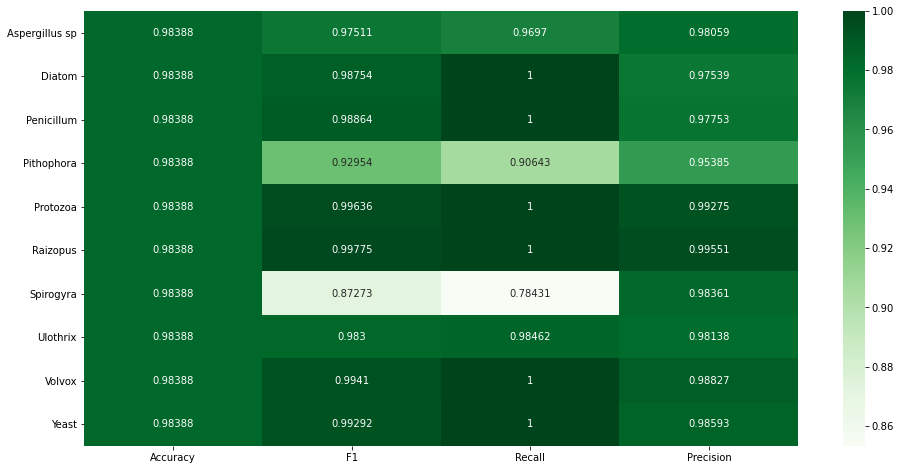

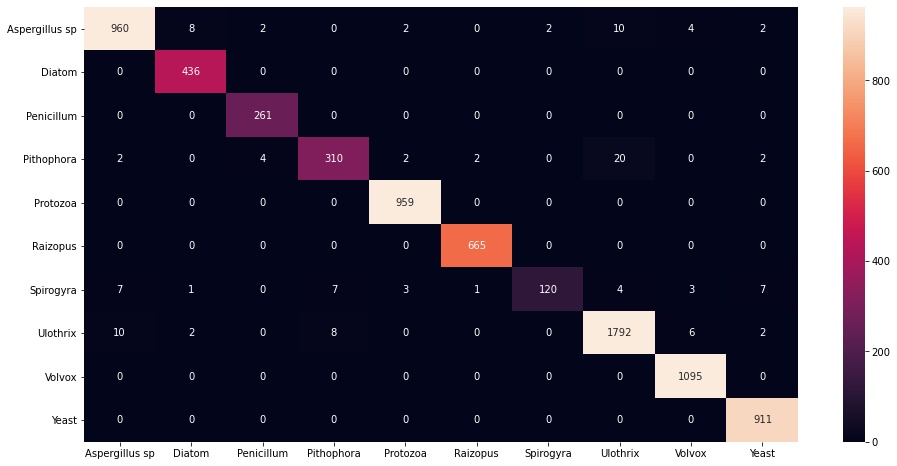

In [162]:
#baseline (compare smote/weights?)

def getConfusionMatrix(estimator, data, target, labels=None):
    preds = estimator.predict(data)
    matrix_raw = confusion_matrix(target, preds)
    dfMatrix = pd.DataFrame(matrix_raw, index=labels, columns=labels)
    plt.subplots(figsize=(16,8))
    sns.heatmap(dfMatrix, annot=True, robust=True, fmt='g')
    return dfMatrix

def getScore(estimator, data, target, labels = None):
    preds = estimator.predict(data)
    results = {}
    results['Accuracy'] = accuracy_score(target, preds)
    results['F1'] = f1_score(target, preds, average=None)
    results['Recall'] = recall_score(target, preds, average=None)
    results['Precision'] = precision_score(target, preds, average=None)
    
    dfResults = pd.DataFrame(results, index=labels)
    #print(dfResults)
    plt.subplots(figsize=(16,8))
    sns.heatmap(dfResults, annot=True, robust=True, cmap='Greens', fmt='0.5g')
    return dfResults


#add some notes to the above, maybe consider tuning scale for matrix

baseline = Pipeline([('scaler', StandardScaler()), 
                    ('clf', DecisionTreeClassifier())])

baseline.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_base = getScore(baseline, X_test, y_test, labels)
print(test_base['F1'].mean())
conf_base = getConfusionMatrix(baseline, X_test, y_test, labels)

0.9696784444927522


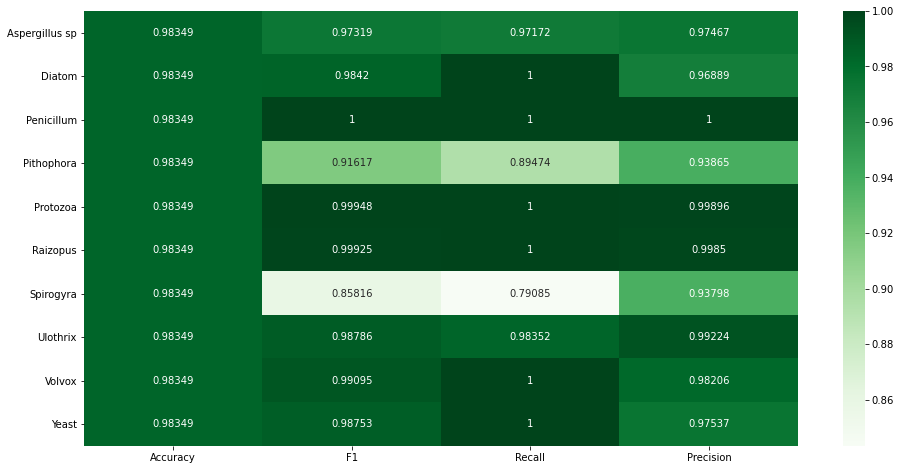

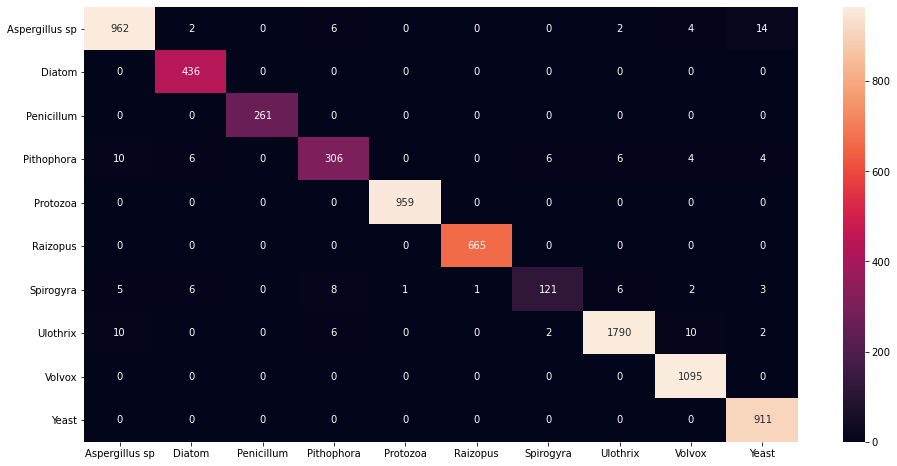

In [163]:
baseline_resampled = imbPipe([('scaler', StandardScaler()), 
                    ('smote', SMOTE()),
                    ('clf', DecisionTreeClassifier())])

baseline_resampled.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_base_resampled = getScore(baseline_resampled, X_test, y_test, labels)
print(test_base_resampled['F1'].mean())
conf_base_resampled = getConfusionMatrix(baseline_resampled, X_test, y_test, labels)

0.932933901298685


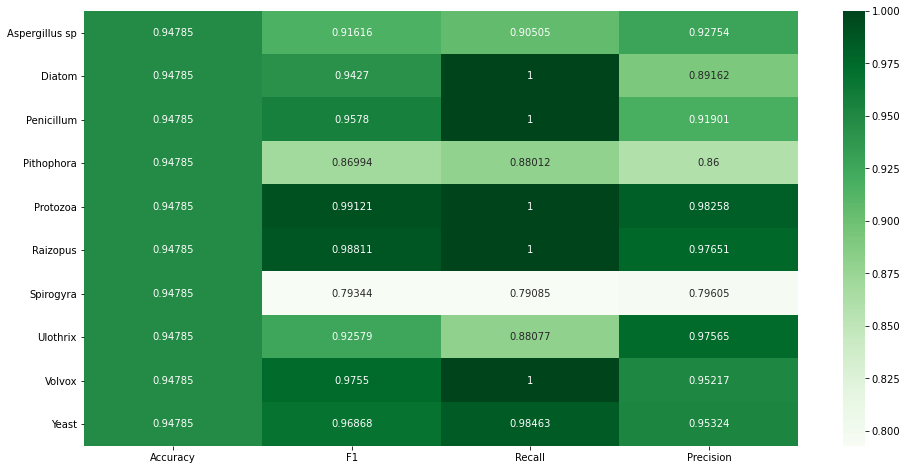

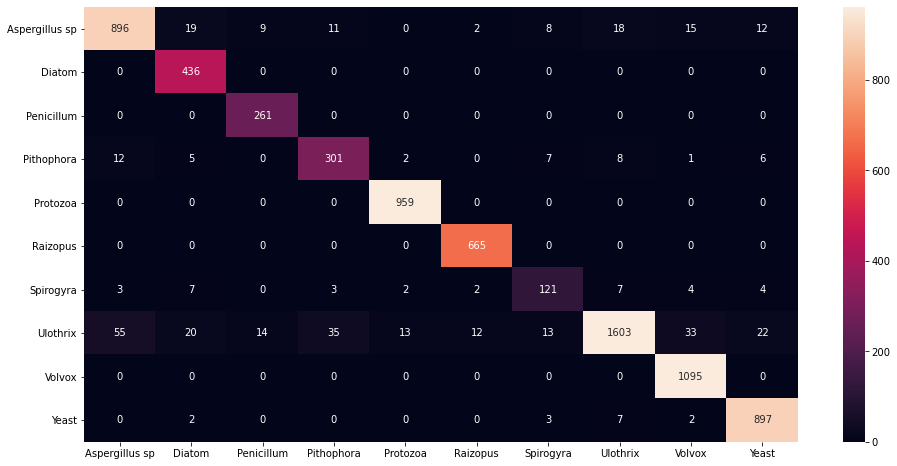

In [164]:
#knn base, knn tuned
knn_default = imbPipe([('scaler', StandardScaler()), 
                    ('smote', SMOTE()),
                    ('knn', KNeighborsClassifier())])

knn_default.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_knn_default = getScore(knn_default, X_test, y_test, labels)
print(test_knn_default['F1'].mean())
conf_knn_default = getConfusionMatrix(knn_default, X_test, y_test, labels)
#resampling 0.9441249765792309
#just scaling 0.9115855645380426

0.9710118518088798


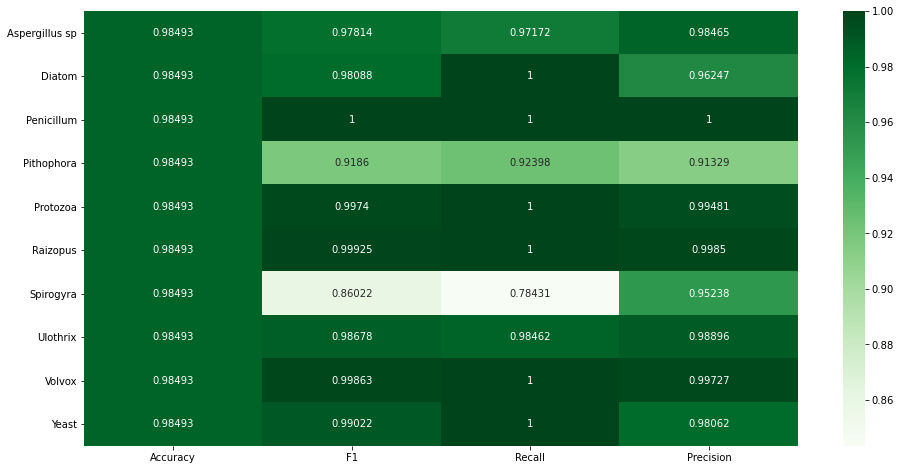

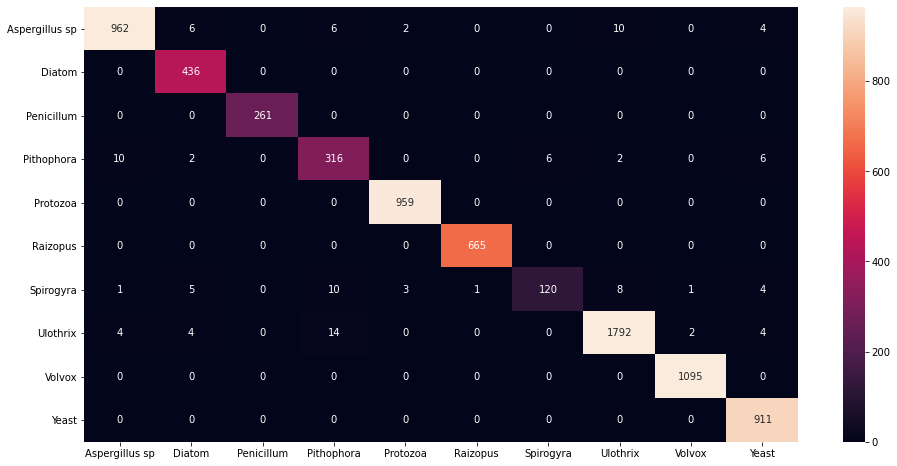

In [165]:
knn_custom = imbPipe([('scaler', StandardScaler()), 
                    ('smote', SMOTE()),
                    ('knn', KNeighborsClassifier(n_neighbors=1, p=1))])

knn_custom.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_knn_custom = getScore(knn_custom, X_test, y_test, labels)
print(test_knn_custom['F1'].mean())
conf_knn_custom = getConfusionMatrix(knn_custom, X_test, y_test, labels)

0.9753659987634478


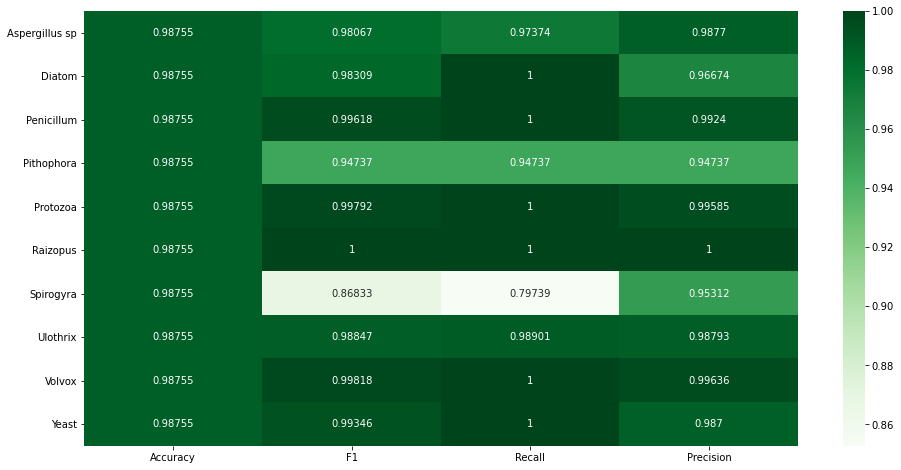

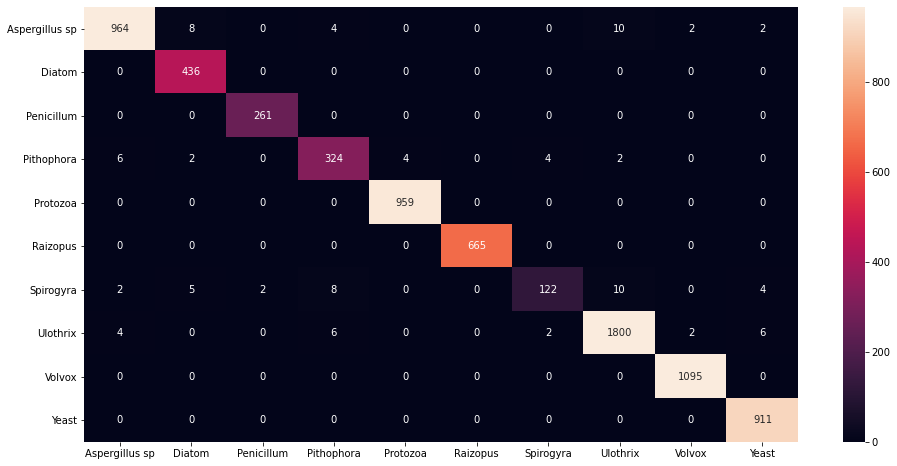

In [166]:
#forest base, forest tuned
forest_resampling = imbPipe([('scaler', StandardScaler()), 
                    ('smote', SMOTE()),
                    ('forest', RandomForestClassifier())])

forest_resampling.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_forest_resampling = getScore(forest_resampling, X_test, y_test, labels)
print(test_forest_resampling['F1'].mean())
conf_forest_resampling = getConfusionMatrix(forest_resampling, X_test, y_test, labels)
#resampling 0.976702279214544
#just scaling 0.978416336265226

0.9743474178714002


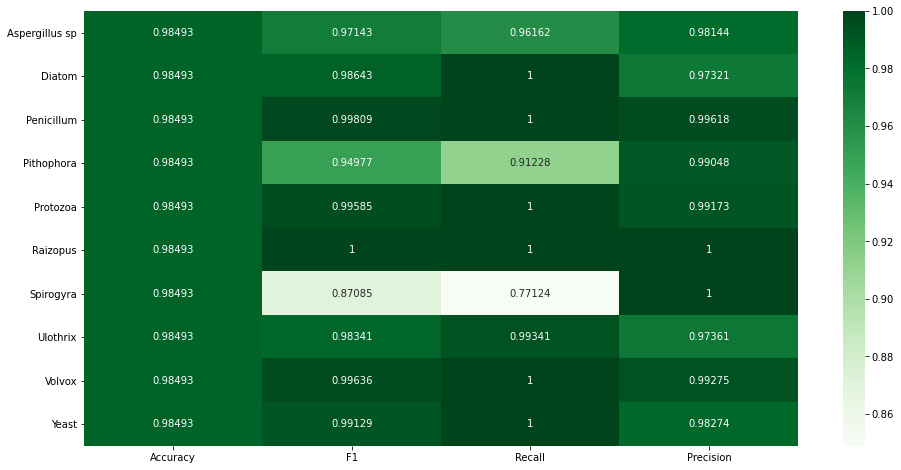

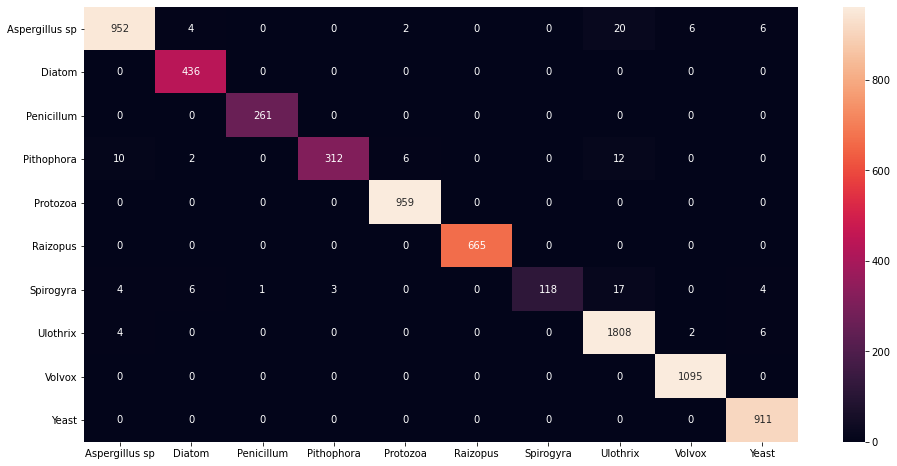

In [167]:
#forest base, forest tuned
forest_weights = imbPipe([('scaler', StandardScaler()), 
                    ('forest', RandomForestClassifier(class_weight='balanced'))])

forest_weights.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_forest_weights = getScore(forest_weights, X_test, y_test, labels)
print(test_forest_weights['F1'].mean())
conf_forest_weights = getConfusionMatrix(forest_weights, X_test, y_test, labels)

0.9745100234125609


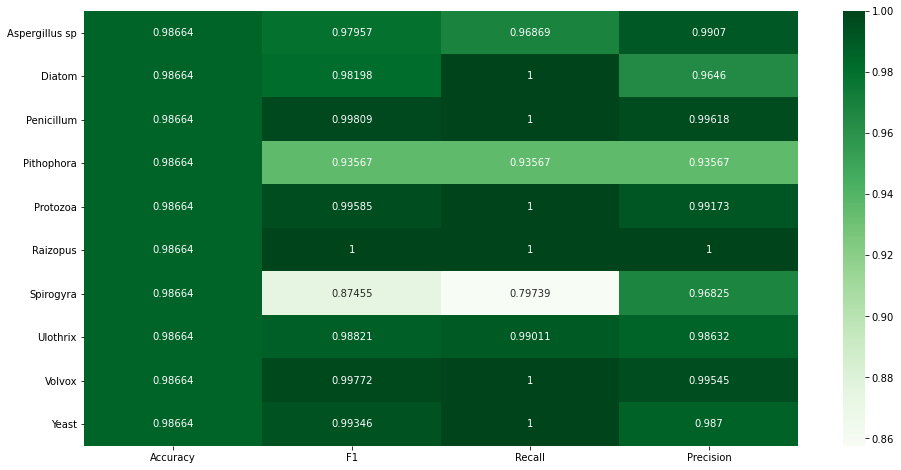

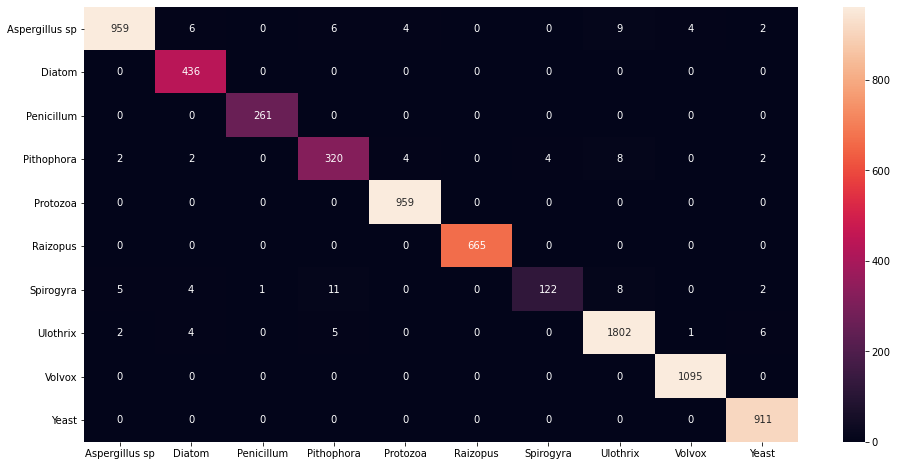

In [168]:
#XGB base, XGB tuned, declare final
XGB_default = imbPipe([('scaler', StandardScaler()), 
                    ('smote', SMOTE()),
                    ('XGB', XGBClassifier())])

XGB_default.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_XGB_default = getScore(XGB_default, X_test, y_test, labels)
print(test_XGB_default['F1'].mean())
conf_XGB_default = getConfusionMatrix(XGB_default, X_test, y_test, labels)

0.9846863744261887


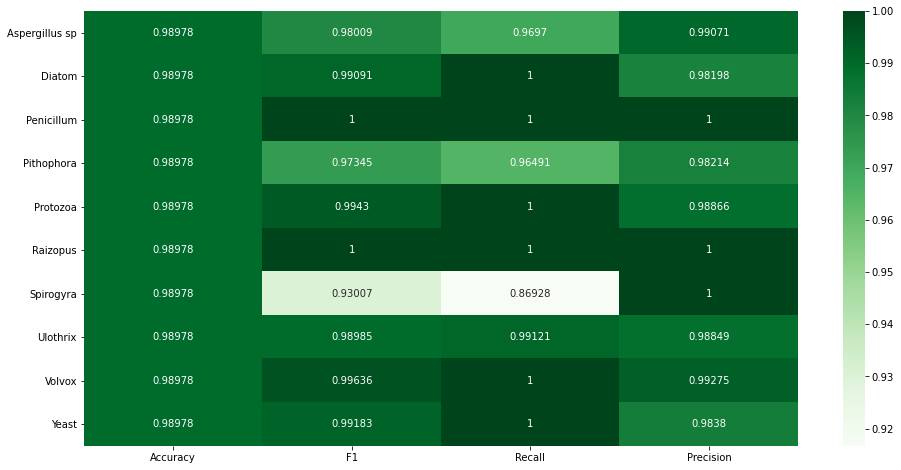

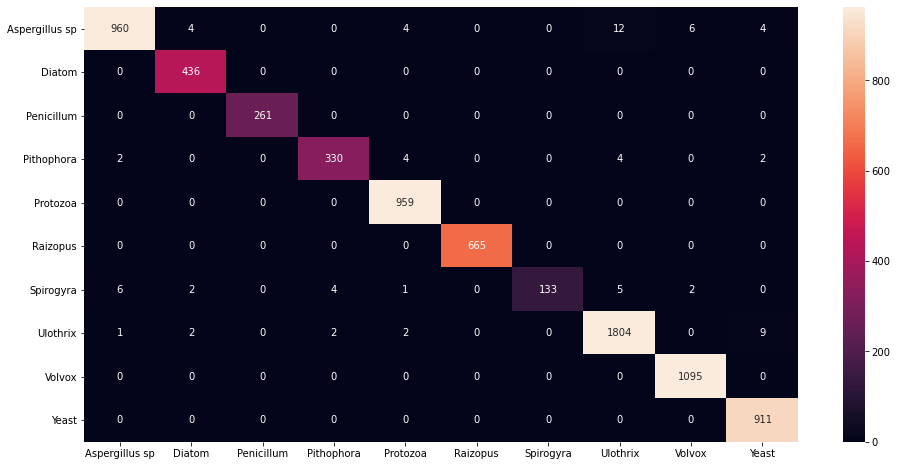

In [169]:
samp_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train 
)


XGB_custom = XGBClassifier(learning_rate=0.3, 
                        max_depth=None, 
                        min_child_weight=1, 
                        subsample=1, 
                        grow_policy='depthwise')

xgb_scaler = StandardScaler()
X_train_scaled = xgb_scaler.fit_transform(X_train)
X_test_scaled = xgb_scaler.transform(X_test)
                       
XGB_custom.fit(X_train_scaled, y_train, sample_weight=samp_weights)

labels = y_test.value_counts().index
labels = labels.sort_values()

test_XGB_custom = getScore(XGB_custom, X_test_scaled,y_test, labels)
print(test_XGB_custom['F1'].mean())
conf_XGB_custom = getConfusionMatrix(XGB_custom, X_test_scaled, y_test, labels)

## Findings

temp

### Predictive Ability
The final model posesses an accuracy of 98.9%, making it well suited to predicting the 10 categories in this data set. 

For the categories `Volvox`, `Yeast`, `Raizopus`, `Protozoa`, `Penicillium`, and `Diatom`, the model correctly identified all instances of these categories.

Other categories that had less prevalence in the dataset, such as `Spirogyra` and `Pithofora`, are not predicted as accurately.

Despite this, the overall performance of the model is very good, with a average F1 score of 0.9847

The graph below shows the average F1 score of the final model as compared to the other, earlier models.

Model Average F1 Score
Baseline, Scaled : 0.9717678232917363
Baseline, Resampling : 0.9696784444927522
Random Forest, Resampling : 0.9753659987634478
Random Forest, Weighted : 0.9743474178714002
KNN, Default params : 0.932933901298685
KNN, Custom params : 0.9710118518088798
XGBoost, Resampling : 0.9745100234125609
XGBoost, Custom params, Weighted : 0.9846863744261887


Text(0, 0.5, 'Average F1 Score')

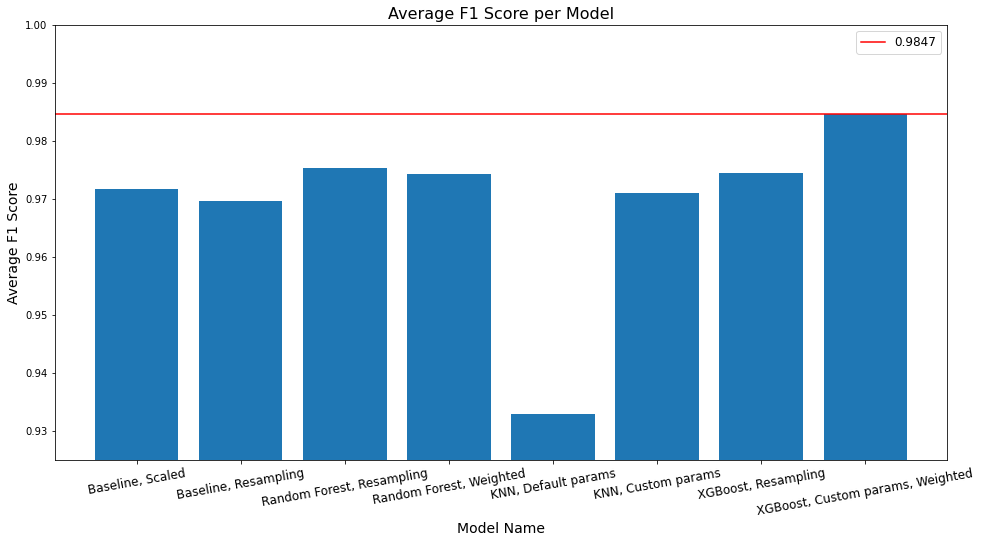

In [177]:
scores = {
    'Baseline, Scaled' : test_base,
    'Baseline, Resampling' : test_base_resampled,
    'Random Forest, Resampling' : test_forest_resampling,
    'Random Forest, Weighted' : test_forest_weights,
    'KNN, Default params' : test_knn_default,
    'KNN, Custom params': test_knn_custom,
    'XGBoost, Resampling' : test_XGB_default,
    'XGBoost, Custom params, Weighted' : test_XGB_custom
}
print('Model Average F1 Score')
avg_f1 = []
for key in scores.keys():
    print(key, ':', scores[key]['F1'].mean())
    avg_f1.append(scores[key]['F1'].mean())
fig, ax = plt.subplots(figsize=(16,8))
ax.bar((range(len(scores))), avg_f1, align='center')
       
plt.xticks(np.arange(len(scores)), scores.keys())
plt.xticks(rotation=10, fontsize=12)
plt.ylim(0.925, 1.0)

plt.axhline(scores['XGBoost, Custom params, Weighted']['F1'].mean(), 
            color='r', 
            label=round(scores['XGBoost, Custom params, Weighted']['F1'].mean(),4))
plt.legend(fontsize=12)
plt.title('Average F1 Score per Model', fontsize=16)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Average F1 Score', fontsize=14)

### Feature Importance

The final model prioritized the feature `ConvexArea` highest, followed by `raddi` and `Perimeter`.

This is distinct from the earlier Random Forest models, which focuesd more on `raddi`, while `ConvexArea` was only the fourth most important feature. The graph below visualizes this.


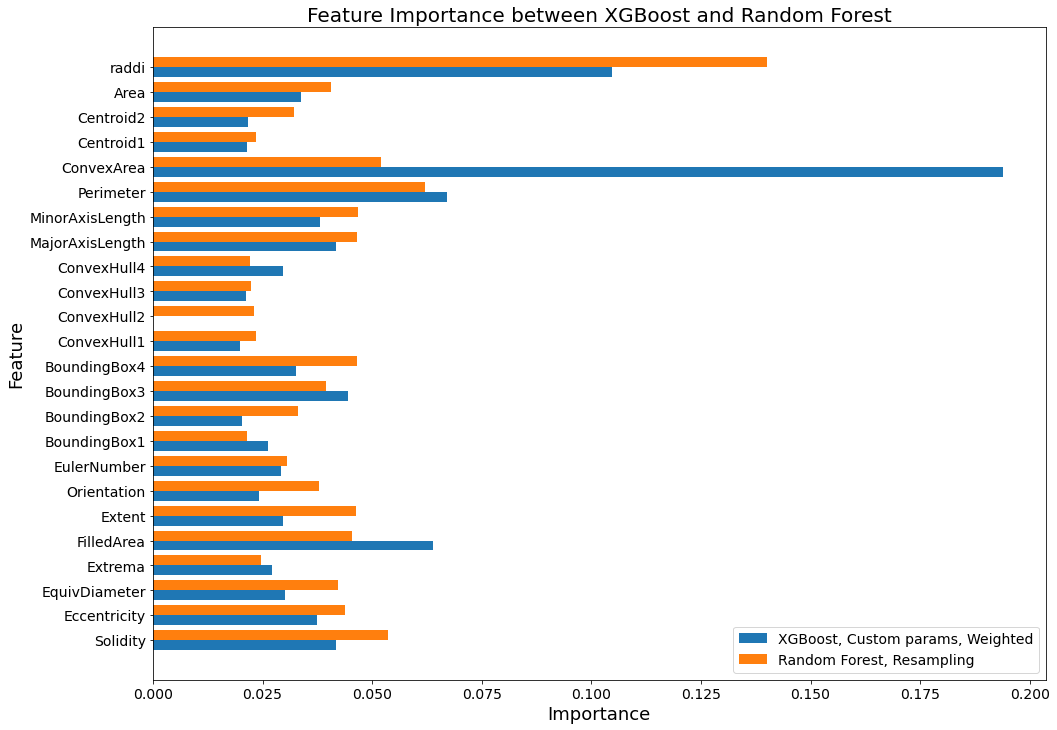

In [171]:
def compare_feature_importances(model1, model2, model_labels):
    n_features = X_train.shape[1]
    plt.figure(figsize=(16,12))
    plt.barh(np.arange(n_features) - 0.2, model1.feature_importances_, 0.4, align='center', label=model_labels[0])
    plt.barh(np.arange(n_features) + 0.2, model2.feature_importances_, 0.4, align='center', label=model_labels[1])
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Importance', fontsize=18)
    plt.ylabel('Feature', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.title(f'''Feature Importance between {model_labels[0].split(',')[0]} and {model_labels[1].split(',')[0]}''', 
              fontsize=20)
    
model_names = ['XGBoost, Custom params, Weighted', 'Random Forest, Resampling']
compare_feature_importances(XGB_custom, 
                            forest_resampling.named_steps[list(forest_resampling.named_steps.keys())[-1]], 
                            model_names)

## Recommendations
temp


### Focus Imaging Process

Because the final model determines the most from the `ConvexArea` and `raddi` of an observed object, the process of taking and converting the microscopic images should focus on improving the accuracy of those two features. This would improve the predictive ability of the model.

The graph below demonstrates the importance of these two features, compared to the rest of the dataset.

Text(0.5, 1.0, 'Final Model Feature Importance')

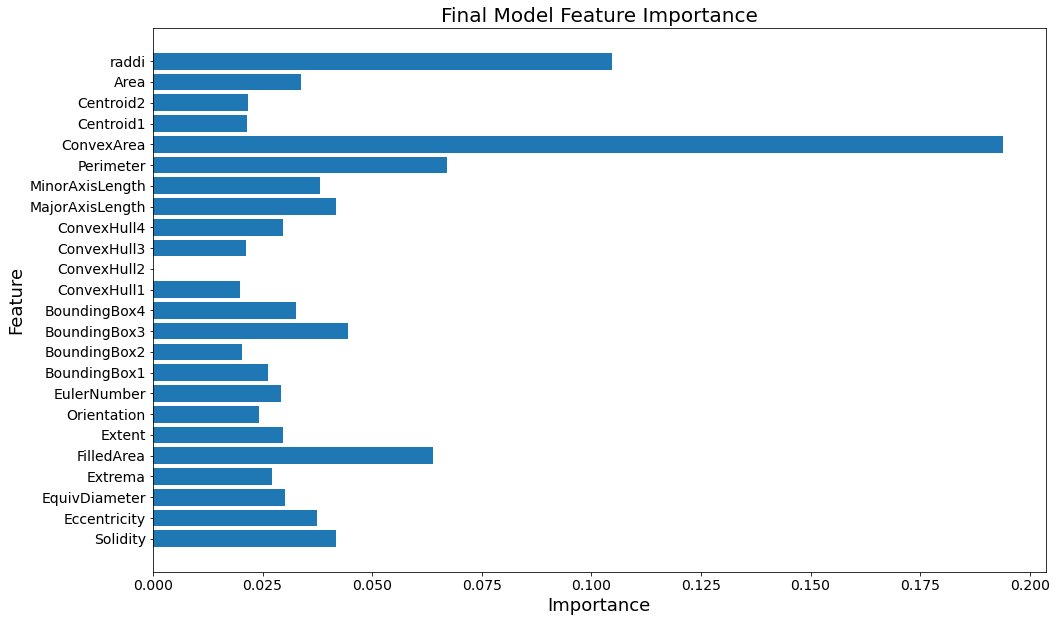

In [172]:
n_features = X_train.shape[1]
plt.figure(figsize=(16,10))
plt.barh(np.arange(n_features), XGB_custom.feature_importances_, align='center', label='temp')
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.legend(fontsize=14)
plt.title('Final Model Feature Importance', fontsize=20)

### Limit Use to Best Categories
While the model shows high overall accuracy, several categories perform worse than this average. Most notable is `Spirogyra`, which has a F1 score significantly lower than all other categories.

Because of this, the model should be used with caution when attempting to identify the `Spirogyra` category.

As the graph below shows, `Spirogyra` had the smallest number of data points in the dataset, so collecting and processing more images of `Spirogyra` would likely improve the models performance in this category.


Text(0.5, 1.0, 'Category Distribution (Percentage) & Category F1 Score')

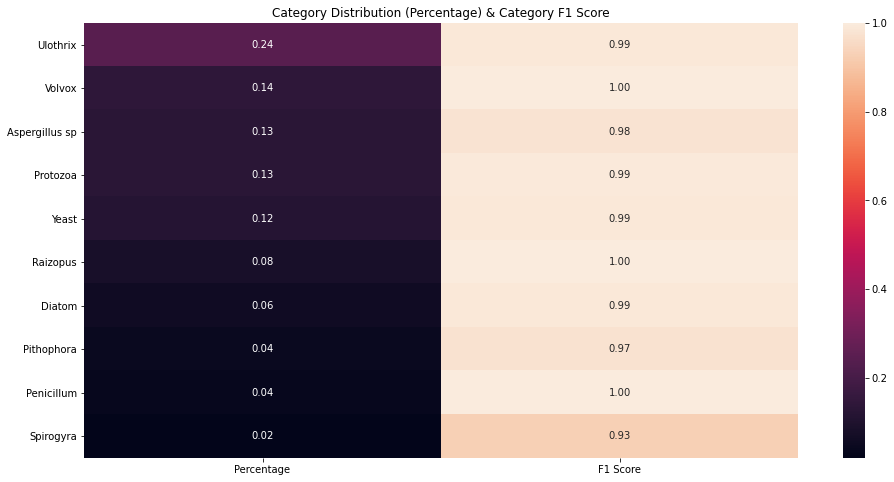

In [196]:
dfRec2 = class_balance[['Percentage']]
dfRec2['F1 Score'] = test_XGB_custom['F1']
dfRec2
plt.subplots(figsize=(16,8))


ax = sns.heatmap(dfRec2, annot=True, fmt = '.2f')
plt.title('Category Distribution (Percentage) & Category F1 Score')

### Next steps
temp